# Libraries

In [27]:
import os
import sys
os.chdir("F:/01Algorithms/Hydrology/HAPI/Examples")
sys.path.append("F:/01Algorithms/Hydrology/HAPI")

from Hapi.visualizer import Visualize as vis
import gdal
import pandas as pd

## Paths

In [28]:
RasterAPath = "data/GIS/Hapi_GIS_Data/acc4000.tif"

To plot the array you need to read the raster using gdal 

In [29]:
# read the raster
src = gdal.Open(RasterAPath)

- then using all the default parameters in the PlotArray method you can directly plot the gdal.Dataset

(<Figure size 576x576 with 2 Axes>,
 <AxesSubplot:title={'center':'Total Discharge'}>)

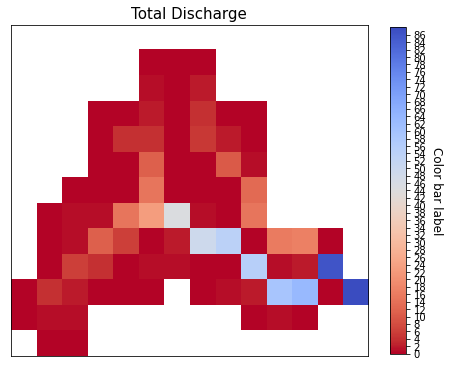

In [30]:
vis.PlotArray(src)

However as you see in the plot you might need to adjust the color to different color scheme or the  
display of the colorbar, colored label. you might don't need to display the labels showing the values
of each cell, and for all of these decisions there are a lot of customizable parameters 

# Basic Figure features

first for the size of the figure you have to pass a tuple with the width and height

- Figsize : [tuple], optional
        figure size. The default is (8,8).
- Title : [str], optional
        title of the plot. The default is 'Total Discharge'.
- titlesize : [integer], optional
        title size. The default is 15.

(<Figure size 576x576 with 2 Axes>,
 <AxesSubplot:title={'center':'Flow Accumulation map'}>)

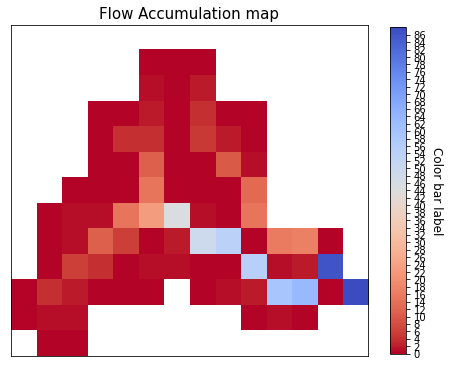

In [31]:
Figsize=(8, 8)
Title='Flow Accumulation map'
titlesize=15

vis.PlotArray(src, Figsize=Figsize, Title=Title, titlesize=titlesize)

# Color Bar

- Cbarlength : [float], optional
        ratio to control the height of the colorbar. The default is 0.75.
- orientation : [string], optional
        orintation of the colorbar horizontal/vertical. The default is 'vertical'.
- cbarlabelsize : integer, optional
        size of the color bar label. The default is 12.
- cbarlabel : str, optional
        label of the color bar. The default is 'Discharge m3/s'.
- rotation : [number], optional
        rotation of the colorbar label. The default is -90.
- TicksSpacing : [integer], optional
        Spacing in the colorbar ticks. The default is 2.

(<Figure size 576x576 with 2 Axes>,
 <AxesSubplot:title={'center':'Total Discharge'}>)

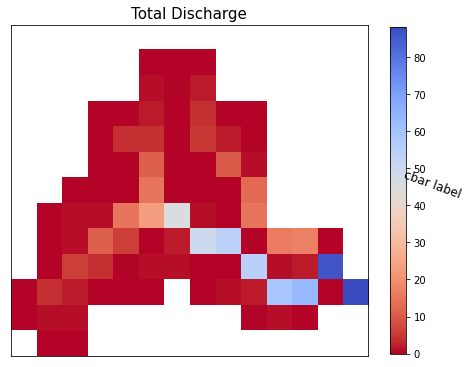

In [32]:
Cbarlength=0.75
orientation='vertical'
cbarlabelsize=12
cbarlabel= 'cbar label'
rotation=-20
TicksSpacing=10

vis.PlotArray(src, Cbarlength=Cbarlength, orientation=orientation,
              cbarlabelsize=cbarlabelsize, cbarlabel=cbarlabel, rotation=rotation,
              TicksSpacing=TicksSpacing)

# Color Schame

- ColorScale : integer, optional
    there are 5 options to change the scale of the colors. The default is 1.
    1- ColorScale 1 is the normal scale
    2- ColorScale 2 is the power scale
    3- ColorScale 3 is the SymLogNorm scale
    4- ColorScale 4 is the PowerNorm scale
    5- ColorScale 5 is the BoundaryNorm scale
    ------------------------------------------------------------------
    gamma : [float], optional
        value needed for option 2 . The default is 1./2..
    linthresh : [float], optional
        value needed for option 3. The default is 0.0001.
    linscale : [float], optional
        value needed for option 3. The default is 0.001.
    midpoint : [float], optional
        value needed for option 5. The default is 0.
    ------------------------------------------------------------------
- cmap : [str], optional
    color style. The default is 'coolwarm_r'.

(<Figure size 576x576 with 2 Axes>,
 <AxesSubplot:title={'center':'Total Discharge'}>)

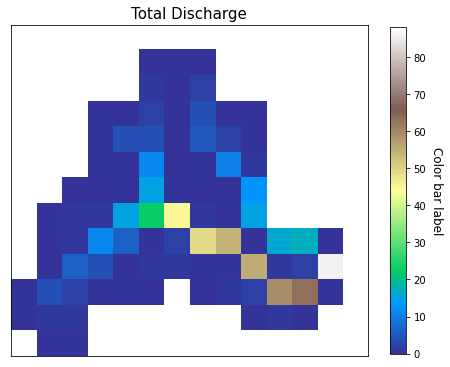

In [33]:
# for normal linear scale
ColorScale = 1
cmap='terrain'
vis.PlotArray(src, ColorScale=ColorScale,cmap=cmap, TicksSpacing=TicksSpacing)

### Power Scale

- The more you lower the value of gamma the more of the color bar you give to the lower value range

(<Figure size 576x576 with 2 Axes>,
 <AxesSubplot:title={'center':'Total Discharge'}>)

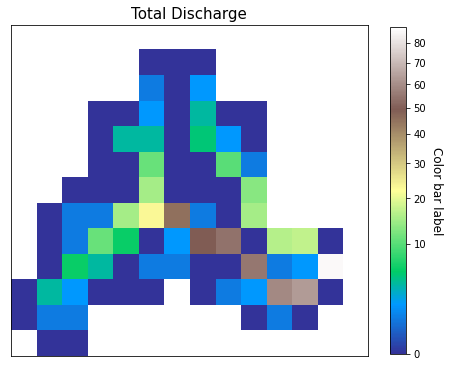

In [34]:
ColorScale = 2
gamma=0.5

vis.PlotArray(src, ColorScale=ColorScale, cmap=cmap, gamma=gamma,
              TicksSpacing=TicksSpacing)

(<Figure size 576x576 with 2 Axes>,
 <AxesSubplot:title={'center':'Total Discharge'}>)

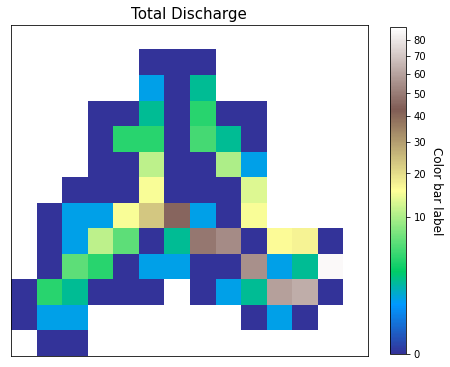

In [35]:
vis.PlotArray(src, ColorScale=ColorScale, cmap=cmap, gamma=0.4,
              TicksSpacing=TicksSpacing)

(<Figure size 576x576 with 2 Axes>,
 <AxesSubplot:title={'center':'Total Discharge'}>)

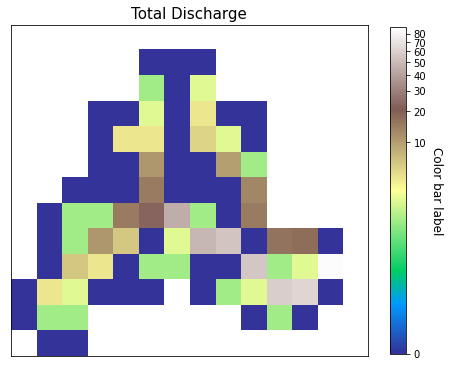

In [36]:
vis.PlotArray(src, ColorScale=ColorScale, cmap=cmap, gamma=0.2,
              TicksSpacing=TicksSpacing)

### SymLogNorm scale

(<Figure size 576x576 with 2 Axes>,
 <AxesSubplot:title={'center':'Total Discharge'}>)

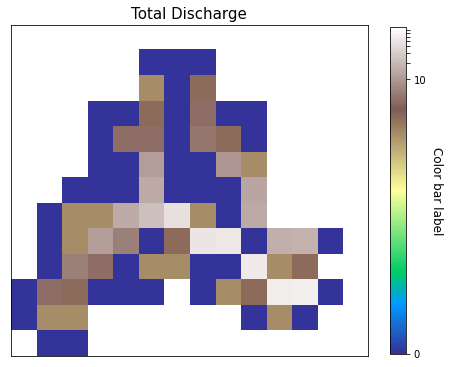

In [37]:
ColorScale = 3
linscale=0.001
linthresh=0.0001
vis.PlotArray(src, ColorScale=ColorScale, linscale=linscale, linthresh=linthresh,
              cmap=cmap, TicksSpacing=TicksSpacing)

### PowerNorm scale

(<Figure size 576x576 with 2 Axes>,
 <AxesSubplot:title={'center':'Total Discharge'}>)

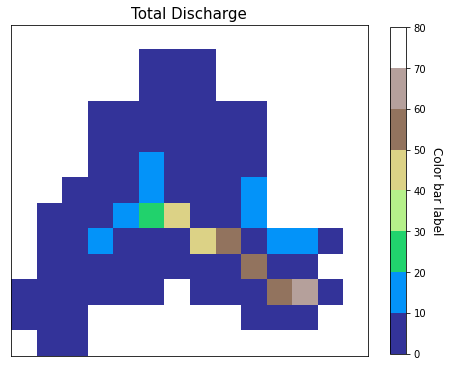

In [38]:
ColorScale = 4
vis.PlotArray(src, ColorScale=ColorScale,
              cmap=cmap, TicksSpacing=TicksSpacing)

### Color scale 5

(<Figure size 576x576 with 2 Axes>,
 <AxesSubplot:title={'center':'Total Discharge'}>)

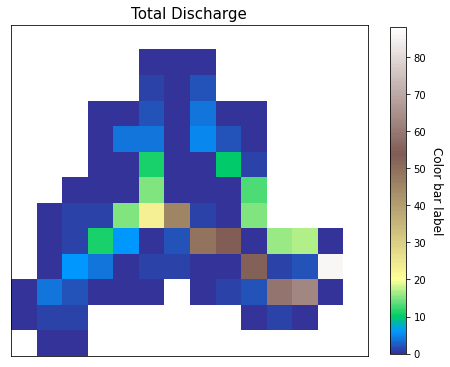

In [39]:
ColorScale = 5
midpoint=20
vis.PlotArray(src, ColorScale=ColorScale, midpoint=midpoint,
              cmap=cmap, TicksSpacing=TicksSpacing)

# Cell value label

- display_cellvalue : [bool]
    True if you want to display the values of the cells as a text
- NumSize : integer, optional
    size of the numbers plotted intop of each cells. The default is 8.
- Backgroundcolorthreshold : [float/integer], optional
    threshold value if the value of the cell is greater, the plotted
    numbers will be black and if smaller the plotted number will be white
    if None given the maxvalue/2 will be considered. The default is None.

(<Figure size 576x576 with 2 Axes>,
 <AxesSubplot:title={'center':'Total Discharge'}>)

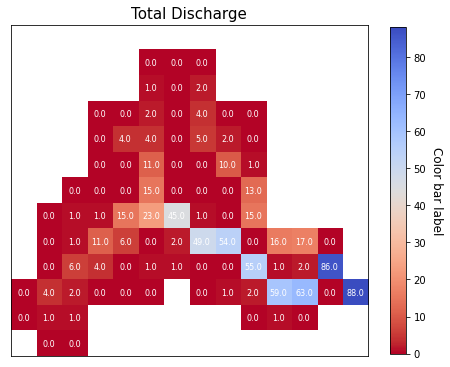

In [40]:
display_cellvalue = True
NumSize=8
Backgroundcolorthreshold=None

vis.PlotArray(src, display_cellvalue=display_cellvalue, NumSize=NumSize,
              Backgroundcolorthreshold=Backgroundcolorthreshold,
              TicksSpacing=TicksSpacing)

# Plot Points

if you have points that you want to display in the map you can read it into a dataframe 
in condition that it has two columns "x", "y" which are the coordinates of the points of theand they have to be 
in the same coordinate system as the raster

In [41]:
# read the points
pointsPath = "data/GIS/Hapi_GIS_Data/points.csv"
points = pd.read_csv(pointsPath)

(<Figure size 576x576 with 2 Axes>,
 <AxesSubplot:title={'center':'Total Discharge'}>)

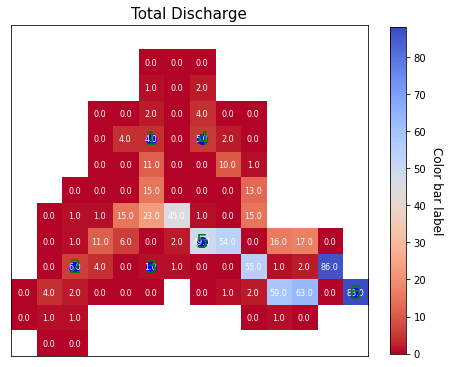

In [42]:
Gaugecolor='blue'
Gaugesize=100
IDcolor="green"
IDsize=20
vis.PlotArray(src, Gaugecolor=Gaugecolor, Gaugesize=Gaugesize,
              IDcolor=IDcolor, IDsize=IDsize, points=points,
              display_cellvalue=display_cellvalue, NumSize=NumSize,
              Backgroundcolorthreshold=Backgroundcolorthreshold,
              TicksSpacing=TicksSpacing)